線形回帰モデル

In [26]:
"""
テストデータを生成してパラメータを学習するための変数を準備
"""

import torch

# 真の係数
w_true = torch.Tensor([1, 2, 3])

# Xのデータの準備。切片を回帰係数に含める為、Xの最初の次元に1を追加しておく
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)

# 真の係数と各Xとの内積を行列とベクトルの積でまとめて計算
y = torch.mv(X, w_true) + torch.randn(100) * 0.5

# 勾配降下で最適化するためのパラメータのTensorを乱数で初期化して作成
w = torch.randn(3, requires_grad=True)

# 学習率
gamma = 0.1

In [27]:
"""
勾配降下法でパラメータを最適化
"""

# 損失関数のログ
losses = []

# 100回イテレーションを回す
for epic in range(100):
    # 前回のbackwardメソッドで計算された勾配の値を削除
    w.grad = None
    
    # 線形モデルでyの予測値を計算
    y_pred = torch.mv(X, w)
    
    # MSE lossとwによる微分を計算
    loss = torch.mean((y - y_pred) ** 2)
    loss.backward()
    
    # 勾配を更新する
    # wをそのまま代入して更新すると異なるTensorになって計算グラフが破壊されてしまうのでdataだけを更新する
    w.data = w.data - gamma * w.grad.data
    
    # 収束確認のためlossを記録しておく
    losses.append(loss.item())

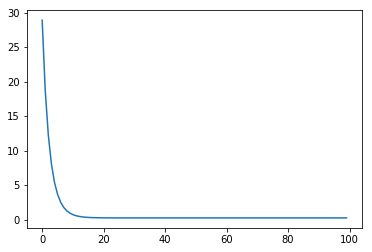

In [28]:
"""
matplotlibでプロット
"""
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(losses)

In [29]:
"""
回帰係数の確認
"""
w

tensor([ 0.9687,  2.0012,  2.9865])

In [30]:
"""
線形回帰モデルの構築と最適化の準備
"""
from torch import nn, optim

# Linear層を作成。今回は切片項は回帰係数に含めるので入力の次元を3とし、biasをFalseにする
net = nn.Linear(in_features=3, out_features=1, bias=False)

# SGDのオプティマイザーに上で定義したネットワークのパラメータを渡して初期化
optimizer = optim.SGD(net.parameters(), lr=0.1)

# MSE lossクラス
loss_fn = nn.MSELoss()

In [31]:
"""
最適化のイテレーションを回す
"""

# 損失関数のログ
losses = []

# 100回イテレーションを回す
for epoc in range(100):
    # 前回のbackwardメソッドで計算された勾配の値を削除
    optimizer.zero_grad()
    
    # 線形モデルでyの予測値を計算
    y_pred = net(X)
    
    # MSES lossを計算
    # y_predは(n, 1)のようなshapeを持っているので(n,)に直す必要がある
    loss = loss_fn(y_pred.view_as(y), y)
    
    # lossのwによる微分を計算
    loss.backward()
    
    # 勾配を更新する
    optimizer.step()
    
    # 収束確認のためにlossを記録しておく
    losses.append(loss.item())

In [32]:
list(net.parameters())

[Parameter containing:
 tensor([[ 0.9687,  2.0012,  2.9865]])]

ロジスティック回帰

In [33]:
"""
irisのデータセットの準備
"""
from sklearn.datasets import load_iris
iris = load_iris()

# irisは(0, 1, 2)の3クラスの分類問題なのでここでは(0, 1)の2クラス分のデータだけ使用する
# 本来は訓練用とテスト用に分けるべきだがここでは省略
X = iris.data[:100]
y = iris.target[:100]

# NumPyのndarrayをPyTorchのTensorに変換
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [34]:
"""
モデルの作成
"""
net = nn.Linear(4, 1)

# シグモイド関数を作用させ、2クラス分類の、クロスエントロピーを計算する関数
loss_fn = nn.BCEWithLogitsLoss()

# SGD(少し大きめの学習率)
optimizer = optim.SGD(net.parameters(), lr=0.25)

In [35]:
"""
パラメータ最適化のイテレーションを回す
"""
# 損失関数のログ
losses = []

# 100回イテレーションを回す
for epoc in range(100):
    # 前回のbackwardメソッドで計算された勾配の値を削除
    optimizer.zero_grad()
    
    # 線形モデルでyの予測値を計算
    y_pred = net(X)
    
    # MSE lossとwによる微分を計算
    loss = loss_fn(y_pred.view_as(y), y)
    loss.backward()
    
    # 勾配を更新する
    optimizer.step()
    
    # 収束確認のためにlossを記録しておく
    losses.append(loss.item())

torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torc

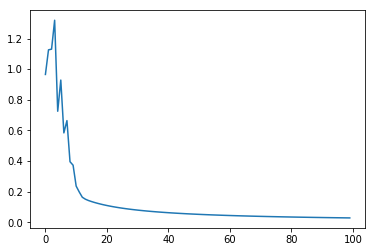

In [36]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(losses)

In [37]:
"""
予測モデル
"""
# 線型結合の結果
h = net(X)

# シグモイド関数を作用させた結果はy=1の確率を表す
prob = nn.functional.sigmoid(h)

# 確率が0.5以上のものをクラス1と予想し、それ以外を0とする
# PyTorchにはbool型がないので対応する型としてByteTensorが出力される
y_pred = prob > 0.5

# 予測結果の確認（yはFloatTesnsorなのでByteTensorに変換してから比較する）
(y.byte() == y_pred.view_as(y)).sum().item()

100

多クラスのロジスティック回帰

In [42]:
"""
10種類の手書き数字のデータセットの分類問題
"""
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

X = torch.tensor(X, dtype=torch.float32)
# CrossEntropy関数はyとしてint64型のTensorを受け取るので注意
y = torch.tensor(y, dtype=torch.int64)

# 出力は10(クラス数)次元
net = nn.Linear(X.size()[1], 10)

# ソフトマックスクロスエントロピー
load_digitsss_fn = nn.CrossEntropyLoss()

#SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [43]:
"""
学習のイテレーション部分
"""
# 損失関数のログ
losses = []

# 100回イテレーションを回す
for epoc in range(100):
    # 前回のbakcwardメソッドで計算された勾配の値を削除
    optimizer.zero_grad()
    
    # 線形モデルでyの予測値を計算
    y_pred = net(X)
    
    # MSE lossとwによる微分を計算
    loss = loss_fn(y_pred, y)
    loss.backward()
    
    # 勾配を更新する
    optimizer.step()
    
    # 収録確認のためにlossを記録しておく
    losses.append(loss.item())

ValueError: Target size (torch.Size([1797])) must be the same as input size (torch.Size([1797, 10]))